# Machine Failure Detection

## 0. Introduction 

Machine Learning have so many potential to be applied in many areas in order to lowering the cost, increasing productivity, avoiding errors, and much more. One of those area that could benefits from the advancement of Machine Learning is Predictive Maintenance (PDM). 

With PDM, we use potentially many process parameters gained from online sensors to determine if our equipment is moving away from stable operating conditions and is heading towards failure. Therefore, the purpose of this project is building an anomaly detection model to act as an early warning system and to avoid the declined productivity due to machine failure.

We will use vibration sensor readings from NASA Acoustics and Vibration Database. Sensor readings were taken on four bearings that were run to failure under constant load and running conditions. The vibration measurement signals are provided for the datasets over the lifetime of the bearings until failure.

## 1. Data Preparation 

In this project, we will use Pandas for data preprocessing, numpy for numerical analysis, and matplotlib as well as seaborn for visualization. So we will import this required library. 

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set()

Load Bearing Dataset in CSV file. This file is located inside "dataset" folder. Then, let's show the first 5 data to get familiarize with our dataset.

In [3]:
df = pd.read_csv('dataset/BearingVibration_Dataset.csv')
df.head()

,Unnamed: 0,Bearing 1,Bearing 2,Bearing 3,Bearing 4
0,2004-02-12 10:52:39,0.060236,0.074227,0.083926,0.044443
1,2004-02-12 11:02:39,0.061455,0.073844,0.084457,0.045081
2,2004-02-12 11:12:39,0.061361,0.075609,0.082837,0.045118
3,2004-02-12 11:22:39,0.061665,0.073279,0.084879,0.044172
4,2004-02-12 11:32:39,0.061944,0.074593,0.082626,0.044659


The dataset consist of 5 columns. The first column is timestamp and the remaining 4 column is the vibration sensor value in that particular timestamp. Next, we will try to rename the dataset's column to make it more readable and show the result.

In [4]:
columns = ['timestamp', 'bearing_1', 'bearing_2', 'bearing_3', 'bearing_4']
bearing_col = ['bearing_1', 'bearing_2', 'bearing_3', 'bearing_4']

df.columns = columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  982 non-null    object 
 1   bearing_1  982 non-null    float64
 2   bearing_2  982 non-null    float64
 3   bearing_3  982 non-null    float64
 4   bearing_4  982 non-null    float64
dtypes: float64(4), object(1)
memory usage: 38.5+ KB


From above information, we could see that our dataset consist of 982 data points and fortunately doesn't have any missing value. However, the datatypes of timestamp seems incorrect. So, we will change it to datetime datatype.

In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  982 non-null    datetime64[ns]
 1   bearing_1  982 non-null    float64       
 2   bearing_2  982 non-null    float64       
 3   bearing_3  982 non-null    float64       
 4   bearing_4  982 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 38.5 KB


Now, our dataset have been optimized. Next, we want to know the distribution of data points based on dates.

## 2. Data Analysis and Visualization 

In [6]:
df['timestamp'].dt.date.value_counts()

2004-02-16    144
2004-02-15    144
2004-02-18    144
2004-02-13    144
2004-02-17    144
2004-02-14    144
2004-02-12     79
2004-02-19     39
Name: timestamp, dtype: int64

Our dataset captured sensor data within 8 days straight which starts from 12 Feb 2004 to 19 Feb 2004. The first and last date have fewer data compared to others. Next, let's plot the sensor value in each day using line chart.

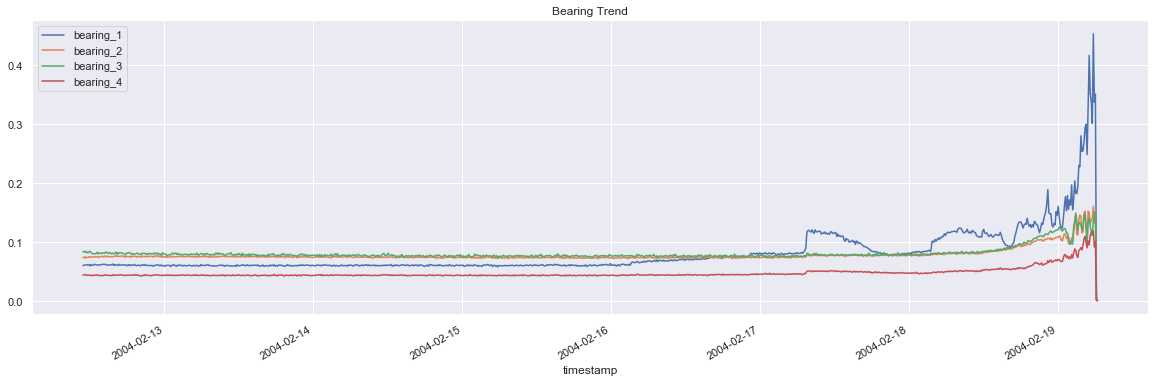

In [7]:
df.plot(kind='line', x='timestamp', figsize=(20,6))
plt.title('Bearing Trend')
plt.show()

The above chart shows the sensor value in each day. The sensors seems to have stable state in the first few days (until 15th Feb) and then starts to increase upnormally in the following days, especially for Bearing 1. This upnormality is getting worse day-by-day until the end of the dataset, which marks the machine's failure.

In order to get better understanding of our data, let's visualize our dataset using box plot.

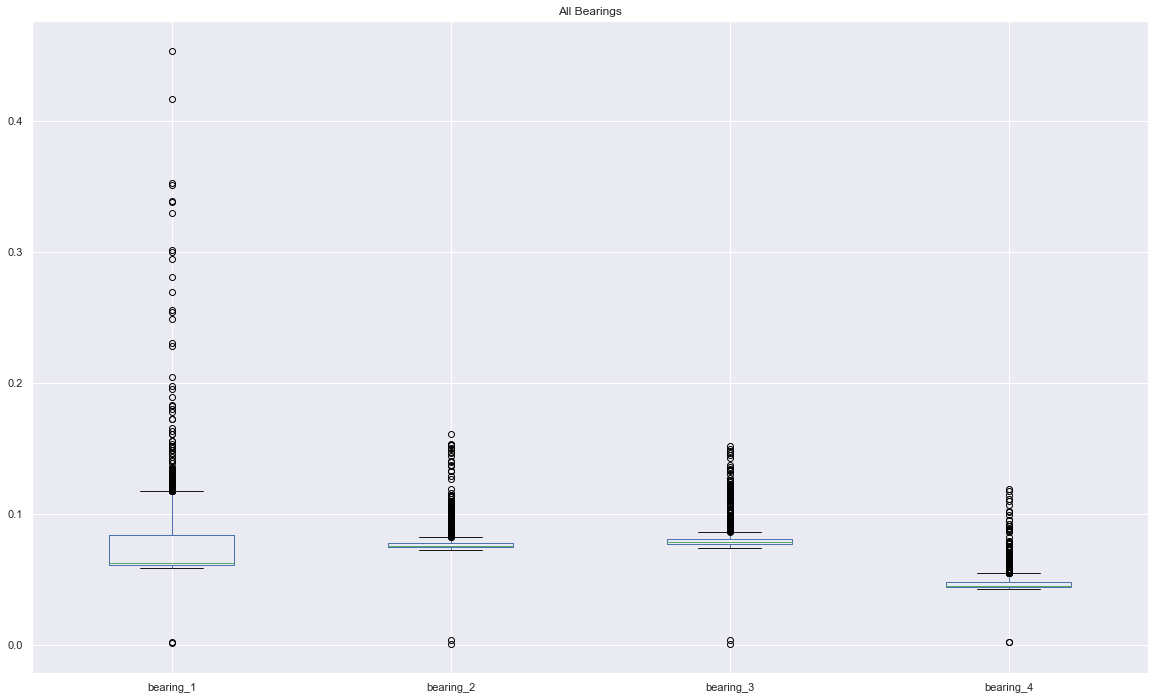

In [8]:
df.plot(kind='box', figsize=(20,12))
plt.title('All Bearings')

plt.show()

From above box plot, Bearing 2, 3, and 4 seems to have similar distribution compared to Bearing 1. Moreover, Bearing 1 also have more anomaly data than the other 3 Bearings. This visualization supports our earlier line chart in which Bearing 1 have more unstable state than the others.

Lastly, let's conduct distribution plot over our dataset.

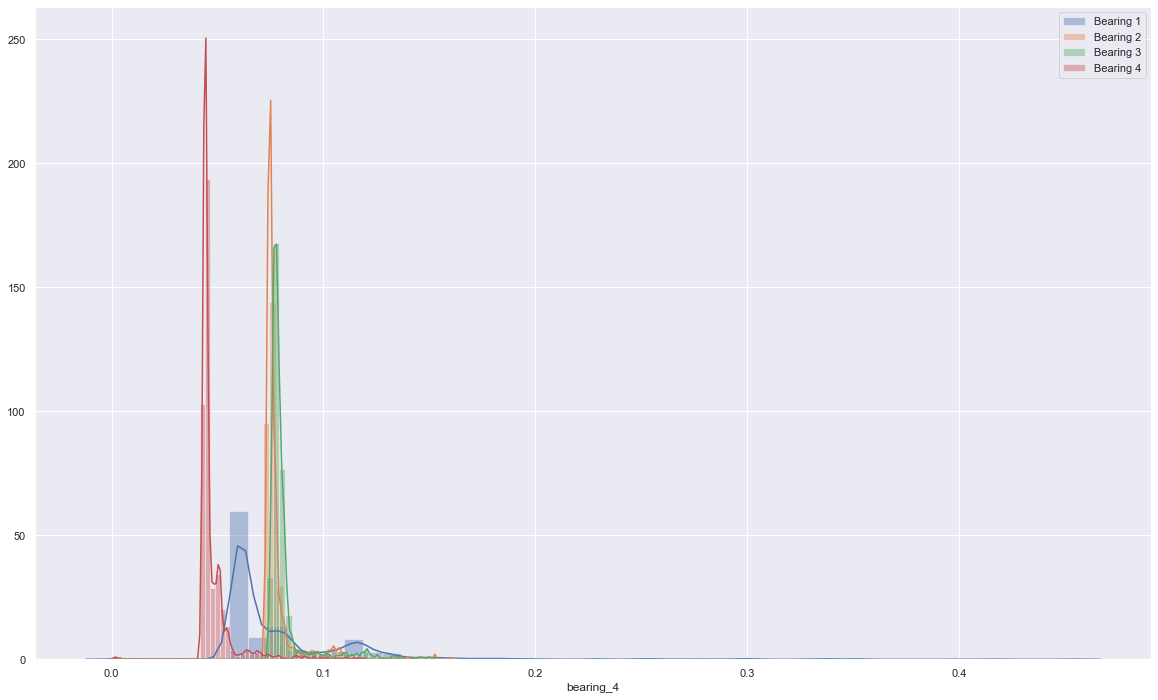

In [9]:
plt.figure(figsize=(20,12))

sns.distplot(df['bearing_1'], label='Bearing 1')
sns.distplot(df['bearing_2'], label='Bearing 2')
sns.distplot(df['bearing_3'], label='Bearing 3')
sns.distplot(df['bearing_4'], label='Bearing 4')

plt.legend()

Similar to other graph, the above plot shows that Bearing 2,3, and 4 have similar distribution and contains lesser anomaly data compared to Bearing 1.

## 3. Further Data Preparation

Based on our earlier analysis, we know that the machine seems to have stable state until 15th Feb. Therefore,  we will divide our dataset into 2 groups, which is normal state and anomaly state. Normal state group will hold data from 12 Feb until 15 Feb, while anomaly data group will hold data from 16 Feb until the end.

Setting index on timestamp and populate normal dataframe starting from beginning until 15th Feb.

In [10]:
df.set_index('timestamp', inplace=True)

normal_df = df.loc[:'2004-02-15']
normal_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 511 entries, 2004-02-12 10:52:39 to 2004-02-15 23:52:39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bearing_1  511 non-null    float64
 1   bearing_2  511 non-null    float64
 2   bearing_3  511 non-null    float64
 3   bearing_4  511 non-null    float64
dtypes: float64(4)
memory usage: 20.0 KB


Our newly created normal dataframe consists of 511 data. Next, let's plot normal dataframe using line chart.

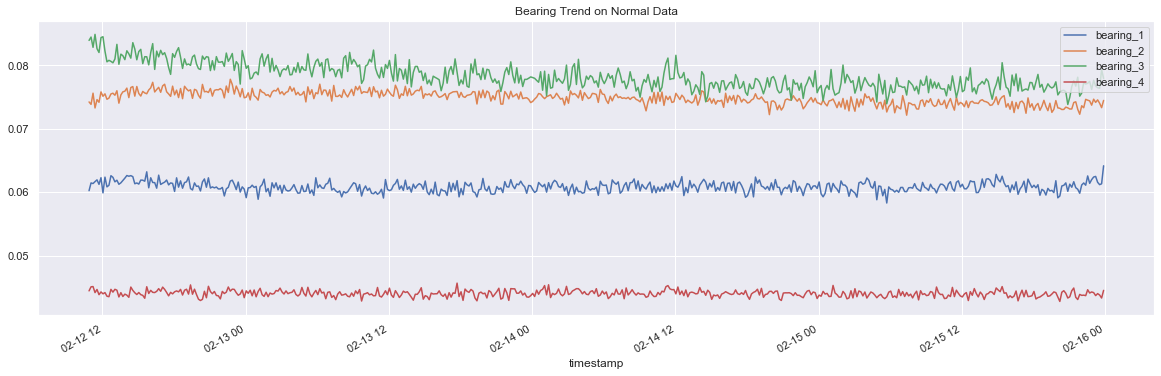

In [11]:
normal_df.plot(kind='line', figsize=(20,6))
plt.title('Bearing Trend on Normal Data')
plt.show()

Afterwards, let's populate anomaly dataframe as well and show the basic information.

In [12]:
anomaly_df = df.loc['2004-02-16':]
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 471 entries, 2004-02-16 00:02:39 to 2004-02-19 06:22:39
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   bearing_1  471 non-null    float64
 1   bearing_2  471 non-null    float64
 2   bearing_3  471 non-null    float64
 3   bearing_4  471 non-null    float64
dtypes: float64(4)
memory usage: 18.4 KB


Our anomaly dataframe consists of 471 data points. Therefore, the total number between normal and anomaly dataframe is 982 data points, which match the total of data points in our dataset. Same as normal dataframe, let's visualize anomaly dataframe using line chart.

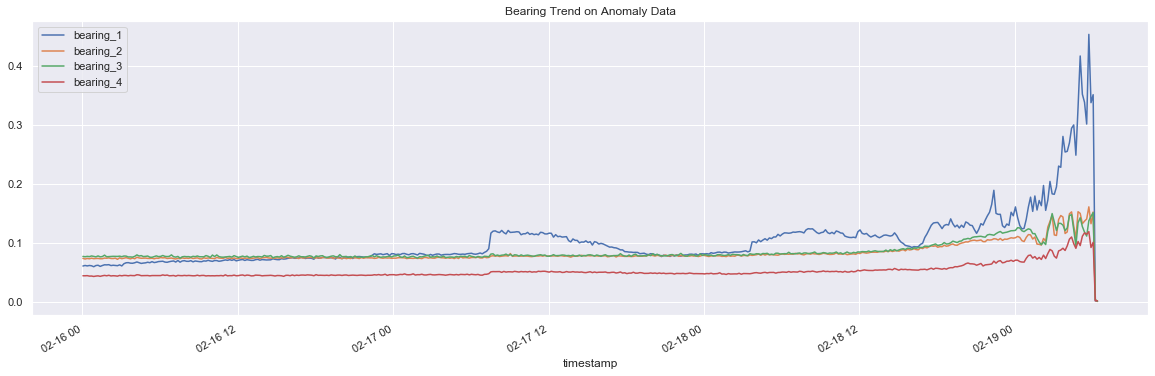

In [13]:
anomaly_df.plot(kind='line', figsize=(20,6))
plt.title('Bearing Trend on Anomaly Data')
plt.show()

## 4. Algorithm 1: PCA + Multivariate Normal Distribution 

The first proposed algorithm is PCA and Multivariate Normal Distribution. In other words, this approach is classified as unsupervised problem. In general, we applied PCA algorithm to reduce Bearing 2, 3, and 4 data into one dimensional data since they share similar distribution. So, we have 2 variable for our detection, which is Bearing 1 and the reduced PCA's data. Next, we will calculate the probability distribution function of Normal Distribution based on these 2 variables. If the calculated probability distribution of the data is smaller than the preset threshold, we will classify this data as anomaly.

So, the first step we are going to do is import PCA and multivariate normal distribution library.

In [14]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

### 4.1. Data Preparation

Next, we will apply the PCA algorithm to our dataset and show the reduced variable.

In [15]:
pca = PCA(n_components=1)

normal_pca_component = pca.fit_transform(normal_df[['bearing_2', 'bearing_3', 'bearing_4']])
normal_pca_df = pd.DataFrame(normal_pca_component, columns=['bearing_pca'])

anomaly_pca_component = pca.fit_transform(anomaly_df[['bearing_2', 'bearing_3', 'bearing_4']])
anomaly_pca_df = pd.DataFrame(anomaly_pca_component, columns=['bearing_pca'])

anomaly_pca_df.head()

,bearing_pca
0,0.013967
1,0.015036
2,0.013924
3,0.014925
4,0.013537


Afterwards, we combine our reduced variable called "bearing_pca" with "bearing_1". Moreover, we will drop the unused variable as well. 

In [16]:
temp_df = normal_df.reset_index()
normal_pca_df = pd.concat([temp_df, normal_pca_df], axis=1, sort=False)

temp_df = anomaly_df.reset_index()
anomaly_pca_df = pd.concat([temp_df, anomaly_pca_df], axis=1, sort=False)

normal_pca_df.drop(['timestamp', 'bearing_2', 'bearing_3', 'bearing_4'], axis=1, inplace=True)
anomaly_pca_df.drop(['timestamp', 'bearing_2', 'bearing_3', 'bearing_4'], axis=1, inplace=True)

normal_pca_df.head()

,bearing_1,bearing_pca
0,0.060236,0.005136
1,0.061455,0.005547
2,0.061361,0.004617
3,0.061665,0.005697
4,0.061944,0.004050


Let's plot our normal and anomaly dataframe to check if it's correct.

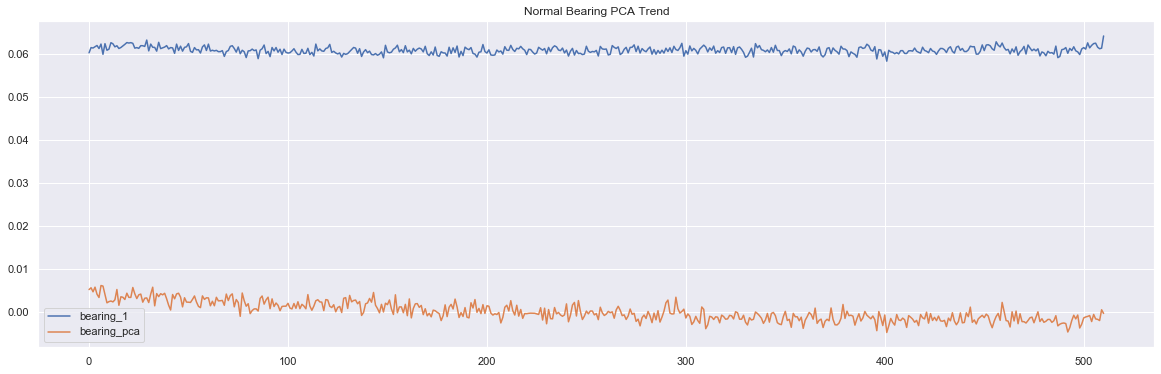

In [17]:
normal_pca_df.plot(kind='line', figsize=(20,6))
plt.title('Normal Bearing PCA Trend')
plt.show()

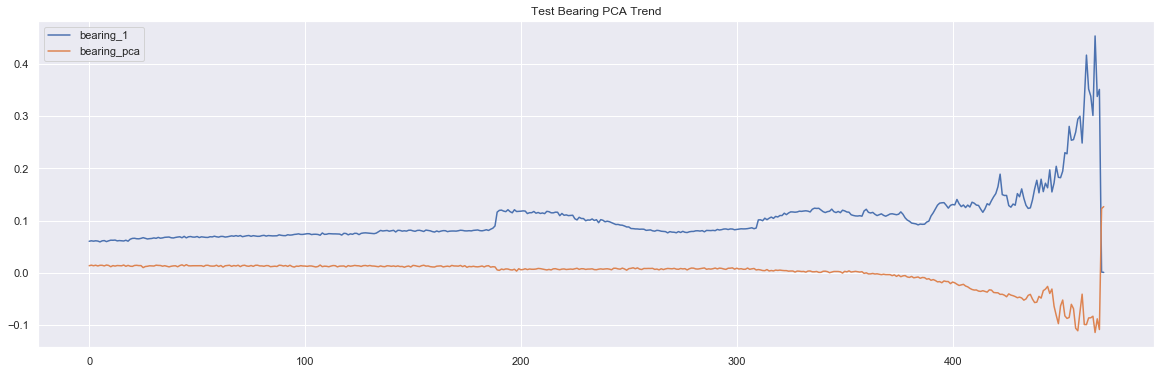

In [18]:
anomaly_pca_df.plot(kind='line', figsize=(20,6))
plt.title('Test Bearing PCA Trend')
plt.show()

### 4.2. Training 

Next, we calculate the mean and covariance of our variables.

In [19]:
means = normal_pca_df.mean().to_list()
covs = normal_pca_df.cov().values
covs

array([[6.49530477e-07, 4.86117542e-07],
       [4.86117542e-07, 4.57504248e-06]])

Let's pass both the mean and covariance into Multivariate Normal class.

In [20]:
mn = multivariate_normal(means, covs)

Our Multivariate Normal Distribution is created. Now, we will visualize multivariate normal distribution space using Matplotlib. However, we must perform some processing into our data first in order to visualize it in 2D space.

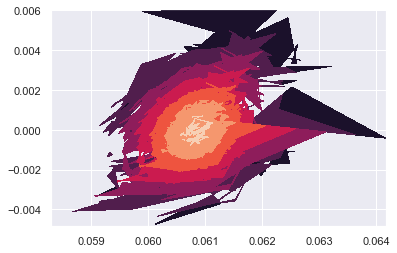

In [21]:
num_row = 10
num_col = int(len(normal_pca_df['bearing_1'].values) / num_row)
num_drop = int(len(normal_pca_df['bearing_1'].values) % num_row)
new_shape = (num_row, num_col)

vis_train_bearing_1 = normal_pca_df.loc[num_drop:, 'bearing_1']
vis_train_bearing_1 = vis_train_bearing_1.to_numpy().reshape(new_shape)

vis_train_bearing_pca = normal_pca_df.loc[num_drop:, 'bearing_pca']
vis_train_bearing_pca = vis_train_bearing_pca.to_numpy().reshape(new_shape)

space = np.empty(new_shape + (2,))
space[:, :, 0] = vis_train_bearing_1
space[:, :, 1] = vis_train_bearing_pca

plt.contourf(vis_train_bearing_1, vis_train_bearing_pca, mn.pdf(space))

### 4.3. Evaluation

Afterwards, let's predict the probability distribution of all data in our dataset and define some threshold. If the probability distribution value is smaller than threshold, we will mark this data as 1 which indicates anomaly, and otherwise 0 which indicates normal data or non-anomaly. Furthermore, we also define the ground truth for our evaluation step. All data in normal dataframe is set to 0 (non-anomaly), while all data in anomaly dataframe is set to 1 (anomaly).

In [22]:
evaluation_pca_df_normal = pd.DataFrame()
evaluation_pca_df_anomaly = pd.DataFrame()

evaluation_pca_df_normal['predicted'] = normal_pca_df.apply(lambda x: 1 if(mn.pdf(x) < 0.00001) else 0, axis=1)
evaluation_pca_df_anomaly['predicted'] = anomaly_pca_df.apply(lambda x: 1 if(mn.pdf(x) < 0.00001) else 0, axis=1)

evaluation_pca_df_normal['actual'] = 0
evaluation_pca_df_anomaly['actual'] = 1

evaluation_pca_df_anomaly

,predicted,actual
0,1,1
1,1,1
2,0,1
3,1,1
4,0,1
...,...,...
466,1,1
467,1,1
468,1,1
469,1,1


Next, we will merge both the normal dataframe and anomaly dataframe into one dataframe in order to make our evaluation easier.

In [23]:
evaluation_pca_df = pd.concat([evaluation_pca_df_normal, evaluation_pca_df_anomaly], 
                              axis=0, sort=False)
evaluation_pca_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 470
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   predicted  982 non-null    int64
 1   actual     982 non-null    int64
dtypes: int64(2)
memory usage: 23.0 KB


We use the precision, recall, and f1-score metrics to get our model performance. Therefore, let's import the necessary package from scikit-learn.

In [24]:
from sklearn.metrics import classification_report

Let's print our model performance.

In [25]:
print(classification_report(evaluation_pca_df['actual'], evaluation_pca_df['predicted']))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       511
           1       1.00      0.98      0.99       471

    accuracy                           0.99       982
   macro avg       0.99      0.99      0.99       982
weighted avg       0.99      0.99      0.99       982



Based on above metrics, we could see that our model have a great performance with 99% accuracy. Therefore, we could conclude that this algorithm could be used to detect anomaly conditions.

## 5. Algorithm 2: Supervised Learning with SVM

The second approach is supervised learning with SVM. As we know earlier, our dataset is divided into 2 groups, normal and anomaly. Therefore, we will label each data in normal data as 0 (non-anomaly) and anomaly data as 1 (anomaly). Then, we split those data to get training data (80%) and test data (20%).

### 5.1. Data Preparation 

Add the the new column to store the ground truth data. We call this column as "actual".

In [26]:
normal_df['actual'] = 0
anomaly_df['actual'] = 1

anomaly_df.head()

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,bearing_1,bearing_2,bearing_3,bearing_4,actual
timestamp,,,,,
2004-02-16 00:02:39,0.060751,0.073686,0.077033,0.044211,1
2004-02-16 00:12:39,0.061643,0.072594,0.076426,0.044189,1
2004-02-16 00:22:39,0.060911,0.073555,0.077088,0.044403,1
2004-02-16 00:32:39,0.061637,0.072990,0.076635,0.043632,1
2004-02-16 00:42:39,0.061124,0.073986,0.077780,0.043753,1


Import the "train_test_split" library. We will use this library to split our data into training data and test data.

In [27]:
from sklearn.model_selection import train_test_split

Before we splitting the data, we need to combine the normal and anomaly dataframe. Then, we store our bearings features into variable "X" and the ground truth into variable "Y". Afterwards, we pass "X" and "Y" variable into "train_test_split" class to get training data and test data.

In [28]:
combined_df = pd.concat([normal_df.reset_index(), anomaly_df.reset_index()], axis=0, sort=False)

X = combined_df[bearing_col]
Y = combined_df['actual']

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=42)
train_x.head()

,bearing_1,bearing_2,bearing_3,bearing_4
25,0.067624,0.075576,0.079598,0.045920
333,0.061314,0.074536,0.076309,0.043954
376,0.116935,0.086315,0.088653,0.056617
17,0.062703,0.074610,0.077441,0.044793
328,0.061061,0.074207,0.076612,0.044145


### 5.2. Parameter Tuning 

Next, let's import Grid Search and SVM package. 

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

Here, we tune the parameter C, gamma, and degree of features. We will use SVM with polynomial kernel type and 4 cross validation. 

In [30]:
c = [0.01, 0.05, 0.1, 0.5, 1, 10, 100]
gammas = [0.01, 0.05, 0.1, 0.5, 1, 10, 100]
degrees = [1, 2, 3, 4, 5, 6, 7, 8]

svm_grid = {'C': c, 'gamma': gammas, 'degree': degrees}

svm = SVC(kernel='poly')
svm_search = GridSearchCV(svm, svm_grid, cv=4, scoring='f1_micro', return_train_score=True, verbose=1)
svm_search.fit(train_x, train_y)

Fitting 4 folds for each of 392 candidates, totalling 1568 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1568 out of 1568 | elapsed:   43.2s finished


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='f1_micro', verbose=1)

Next, let's print the Grid Search's result.

In [31]:
print(svm_search.best_score_)
print(svm_search.best_params_)

0.9821817051693774
{'C': 0.5, 'degree': 7, 'gamma': 100}


### 5.3. Training 

From our Grid Search, we know that the best parameter for our model is C = 0.5, degree = 7, and gamma = 100. We will use this parameter to train our SVM model.

In [32]:
svm_best = SVC(kernel='poly', C=0.5, degree=7, gamma=100)
svm_best.fit(train_x, train_y)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=7, gamma=100, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### 5.4. Evaluation 

Let's predict the test data using our trained model.

In [33]:
predicted = svm_best.predict(test_x)
predicted

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0],
      dtype=int64)

Similar to our first approach, we will print the precision, recall, and f1-score metrics to get the model's performance.

In [34]:
print(classification_report(test_y, predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       103
           1       1.00      0.93      0.96        94

    accuracy                           0.96       197
   macro avg       0.97      0.96      0.96       197
weighted avg       0.97      0.96      0.96       197



From this evaluation, we could see that our model obtained 96% accuracy on test data. Therefore, we could conclude that this approach could be implemented to detect anomaly condition as well.

## 6. Conclusion 

This project discuss 2 kinds of approach to solve the anomaly detection problem. The first one is PCA with Multivariate Normal Distribution. Hence, it is the unsupervised learning problem. And the second one is SVM as supervised learning problem. 

From our evaluation, we could see that both approach obtained a very good result, with 99% accuracy on the first approach and 96% accuracy on the second approach.Therefore, we conclude that these 2 approach can be implemented to perform anomaly detection on machine failures.

### About the Author

This notebook was written by Ekky Rino Fajar Sakti. He received his Bachelor Degree in Computer Science from Ma Chung University. Currently, he is a Data Scientist which helps to build Data Solution for stakeholder. His passion is Data Science, Big Data, and Machine Learning. 
 - Email: ekky.rino@gmail.com
 - LinkedIn: https://www.linkedin.com/in/ekky-rino/